# Sinogram reconstruction

Imports

In [103]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage.transform import rotate
import scipy.fftpack as fft 
from IPython import display

In [41]:
file_path = './sinogram.png'
image = cv2.imread(file_path)
b, g, r = cv2.split(image)
print(b.shape[1])

960


## a) Reconstruction without ramp filtering

In [42]:
print(b.shape)

(1440, 960)


In [58]:
def backProject(channel, theta, colourChannel):
    RGBChannel = ['Reds', 'Greens', 'Blues']
    
    laminogram = np.zeros((channel.shape[1],channel.shape[1]))
    dTheta = theta / channel.shape[0]
    
    
    for i in range(channel.shape[0]):
        temp = np.tile(channel[i],(channel.shape[1],1))
        temp = rotate(temp, dTheta*i)
        plt.imshow(laminogram,cmap=RGBChannel[colourChannel], interpolation='none')
        display.clear_output(wait=True)
        display.display(plt.show())
        laminogram += temp
    
    return laminogram

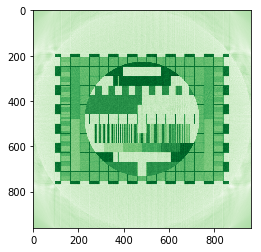

None

In [60]:
def filterTransform(channel):
    # fft translate
    channel = fft.rfft(channel, axis=1)
    # ramp filter
    ramp = np.floor(np.arange(0.5, channel.shape[1]//2 + 0.1, 0.5))
    channel = channel * ramp
    # inverst fft
    channel = fft.irfft(channel, axis=1)
    return channel

bFiltered = filterTransform(b)
rFiltered = filterTransform(r)
gFiltered = filterTransform(g)

bp_b = backProject(bFiltered, 180.0, 2)
bp_r = backProject(rFiltered, 180.0, 0)
bp_g = backProject(gFiltered, 180.0, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


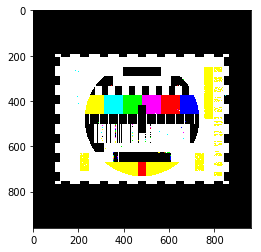

In [104]:
finalImage = cv2.merge((bp_r, bp_g,bp_b))
#cv2.imshow('Outout',bp_r)
#finalImage = finalImage.astype(np.int8)
plt.imshow(finalImage)

